# Лабораторная работа 1. Определение показателей надёжности по результатам испытаний и эксплуатации изделий


Вариант 12

Лазарев Эдуард Артемович
N33471

In [1]:
from matplotlib import pyplot as plt

Введём начальные значения для данного варианта.

Отсортируем их и посчитаем среднюю наработку на отказ.

In [2]:
N = 100 # Количество однотипных изделий.

# Моменты времени выхода из строя изделий.
failure_times = [
    1525.56, 608.26, 307.39, 1283.26, 216.22, 558.59, 70.13, 58.08, 1005.60, 917.55,
    1096.55, 957.78, 1335.17, 350.61, 590.09, 1169.86, 1355.23, 875.59, 525.39, 1075.80,
    851.13, 1015.86, 598.38, 999.91, 1380.72, 565.27, 1355.59, 78.51, 1255.15, 521.35,
    1066.06, 1095.58, 1155.68, 1211.27, 101.22, 551.75, 306.53, 919.55, 1281.12, 208.37,
    91.17, 533.89, 165.11, 198.28, 131.53, 830.57, 331.19, 235.38, 155.78, 195.35,
    922.26, 765.82, 717.25, 1558.59, 1257.96, 552.35, 639.90, 837.15, 1526.53, 122.19,
    1178.00, 202.39, 195.65, 699.75, 777.06, 305.89, 813.91, 827.50, 1590.59, 708.60,
    286.05, 218.18, 1331.75, 153.58, 1502.52, 529.90, 268.73, 270.80, 273.21, 1013.19,
    766.70, 1205.05, 1191.28, 1151.18, 369.39, 167.91, 590.50, 987.81, 709.12, 1398.06,
    825.27, 535.80, 217.39, 617.32, 1215.83, 535.75, 86.16, 377.87, 1538.33, 905.80, 
]

failure_times.sort()
print(f"Sorted: {failure_times}")
print(f"\nСредняя наработка на отказ: T = {sum(failure_times) / len(failure_times):.2f}")

Sorted: [58.08, 70.13, 78.51, 86.16, 91.17, 101.22, 122.19, 131.53, 153.58, 155.78, 165.11, 167.91, 195.35, 195.65, 198.28, 202.39, 208.37, 216.22, 217.39, 218.18, 235.38, 268.73, 270.8, 273.21, 286.05, 305.89, 306.53, 307.39, 331.19, 350.61, 369.39, 377.87, 521.35, 525.39, 529.9, 533.89, 535.75, 535.8, 551.75, 552.35, 558.59, 565.27, 590.09, 590.5, 598.38, 608.26, 617.32, 639.9, 699.75, 708.6, 709.12, 717.25, 765.82, 766.7, 777.06, 813.91, 825.27, 827.5, 830.57, 837.15, 851.13, 875.59, 905.8, 917.55, 919.55, 922.26, 957.78, 987.81, 999.91, 1005.6, 1013.19, 1015.86, 1066.06, 1075.8, 1095.58, 1096.55, 1151.18, 1155.68, 1169.86, 1178.0, 1191.28, 1205.05, 1211.27, 1215.83, 1255.15, 1257.96, 1281.12, 1283.26, 1331.75, 1335.17, 1355.23, 1355.59, 1380.72, 1398.06, 1502.52, 1525.56, 1526.53, 1538.33, 1558.59, 1590.59]

Средняя наработка на отказ: T = 727.10


Определим функцию для подсчёта индикаторов надёжности системы.

In [3]:
def calc_rel_indicators(n_times_intervals: int) -> dict:
    """Расчёт показателей надёжности системы."""
    
    # Интервал времени.
    dt = max(failure_times) / n_times_intervals
    
    # Количество отказов изделий, приходящийся на интервал времени dt_i.
    dR = [0] * n_times_intervals
    for time in failure_times:
        if time // dt * dt == time:
            dR[int(time // dt) - 1] += 1
        else:
            dR[int(time // dt)] += 1
            
    # Общее число отказов в интервале времени (0, t_i).
    # Ноль в конце добовляем что бы индексация по `-1` возращала 0.
    R = [sum(dR[0:idx + 1]) for idx in range(n_times_intervals)] + [0]
    
    # Оценка интенсивности отказов.
    Lambda = [dR[idx] / ((N - R[idx - 1]) * dt) for idx in range(n_times_intervals)]
    
    # Плотность распределения отказов.
    A = [dR[idx] / (N * dt) for idx in range(n_times_intervals)]
    
    # Функция надёжности изделия.
    P = [1 - R[idx - 1] / N for idx in range(n_times_intervals)]
    
    return {
        "dR": dR,
        "Lambda": Lambda,
        "A": A,
        "P": P,
    }

Определим функцию для вывода результатов расчётов в виде таблицы.

In [4]:
def print_results(n_times_intervals: int, indicators: dict) -> None:
    """Вывод результатов расчётов в виде таблицы."""
    # Расчёт интеравала времени для вывода.
    dt = max(failure_times) / number_of_time_intervals

    print("                   |   Кол-во   |  Интенсив- |  Плотность | Функция    |           \n"
          "     Интервалы     |  отказов   |    ность   |  распреде- | надёжности |  Контроль \n"
          "                   |            |   отказов  |    ления   |            |           \n"
          "-------------------+------------+------------+------------+------------+-----------")
    for idx in range(number_of_time_intervals):
        print(f"({dt * idx:>7.2f}, {dt * (idx + 1):>7.2f}) |"
              f" {indicators['dR'][idx]:^10} |"
              f" {indicators['Lambda'][idx]:^10.2} |"
              f" {indicators['A'][idx]:^10.2} |"
              f" {indicators['P'][idx]:^10.2} |"
              f" {abs(indicators['Lambda'][idx] * indicators['P'][idx] - indicators['A'][idx]):^10.2f}")

Определим функцию для постройки графиков.

In [5]:
def plot(*list_of_indicators):
    fig, axs = plt.subplots(2, 2, figsize=(18, 15))
    
    axs[0, 0].set_title("dr")
    axs[0, 1].set_title("lambda")
    axs[1, 0].set_title("a")
    axs[1, 1].set_title("p")
    
    for indicators in list_of_indicators:
        number_of_time_intervals = len(indicators["dR"])
        dt = max(failure_times) / number_of_time_intervals
        
        x_range = [dt * idx + dt / 2 for idx in range(number_of_time_intervals)]
        
        axs[0, 0].plot(x_range, indicators["dR"], label=f"n = {number_of_time_intervals}")
        axs[0, 1].plot(x_range, indicators["Lambda"], label=f"n = {number_of_time_intervals}")
        axs[1, 0].plot(x_range, indicators["A"], label=f"n = {number_of_time_intervals}")
        axs[1, 1].plot(x_range, indicators["P"], label=f"n = {number_of_time_intervals}")
    
    axs[0, 0].legend()
    axs[0, 1].legend()
    axs[1, 0].legend()
    axs[1, 1].legend()

Выполним расчёты для разных *n*.

In [6]:
number_of_time_intervals = 10

# Получаем индикаторы надёжности системы.
indicators_10 = calc_rel_indicators(number_of_time_intervals)

# Вывод в виде таблицы.
print_results(number_of_time_intervals, indicators_10)

                   |   Кол-во   |  Интенсив- |  Плотность | Функция    |           
     Интервалы     |  отказов   |    ность   |  распреде- | надёжности |  Контроль 
                   |            |   отказов  |    ления   |            |           
-------------------+------------+------------+------------+------------+-----------
(   0.00,  159.06) |     10     |  0.00063   |  0.00063   |    1.0     |    0.00   
( 159.06,  318.12) |     18     |   0.0013   |   0.0011   |    0.9     |    0.00   
( 318.12,  477.18) |     4      |  0.00035   |  0.00025   |    0.72    |    0.00   
( 477.18,  636.24) |     15     |   0.0014   |  0.00094   |    0.68    |    0.00   
( 636.24,  795.29) |     8      |  0.00095   |   0.0005   |    0.53    |    0.00   
( 795.29,  954.35) |     11     |   0.0015   |  0.00069   |    0.45    |    0.00   
( 954.35, 1113.41) |     10     |   0.0018   |  0.00063   |    0.34    |    0.00   
(1113.41, 1272.47) |     10     |   0.0026   |  0.00063   |    0.24    |    

In [7]:
number_of_time_intervals = 25

# Получаем индикаторы надёжности системы.
indicators_25 = calc_rel_indicators(number_of_time_intervals)

# Вывод в виде таблицы.
print_results(number_of_time_intervals, indicators_25)

                   |   Кол-во   |  Интенсив- |  Плотность | Функция    |           
     Интервалы     |  отказов   |    ность   |  распреде- | надёжности |  Контроль 
                   |            |   отказов  |    ления   |            |           
-------------------+------------+------------+------------+------------+-----------
(   0.00,   63.62) |     1      |  0.00016   |  0.00016   |    1.0     |    0.00   
(  63.62,  127.25) |     6      |  0.00095   |  0.00094   |    0.99    |    0.00   
( 127.25,  190.87) |     5      |  0.00085   |  0.00079   |    0.93    |    0.00   
( 190.87,  254.49) |     9      |   0.0016   |   0.0014   |    0.88    |    0.00   
( 254.49,  318.12) |     7      |   0.0014   |   0.0011   |    0.79    |    0.00   
( 318.12,  381.74) |     4      |  0.00087   |  0.00063   |    0.72    |    0.00   
( 381.74,  445.37) |     0      |    0.0     |    0.0     |    0.68    |    0.00   
( 445.37,  508.99) |     0      |    0.0     |    0.0     |    0.68    |    

In [8]:
number_of_time_intervals = 40

# Получаем индикаторы надёжности системы.
indicators_40 = calc_rel_indicators(number_of_time_intervals)

# Вывод в виде таблицы.
print_results(number_of_time_intervals, indicators_40)

                   |   Кол-во   |  Интенсив- |  Плотность | Функция    |           
     Интервалы     |  отказов   |    ность   |  распреде- | надёжности |  Контроль 
                   |            |   отказов  |    ления   |            |           
-------------------+------------+------------+------------+------------+-----------
(   0.00,   39.76) |     0      |    0.0     |    0.0     |    1.0     |    0.00   
(  39.76,   79.53) |     3      |  0.00075   |  0.00075   |    1.0     |    0.00   
(  79.53,  119.29) |     3      |  0.00078   |  0.00075   |    0.97    |    0.00   
( 119.29,  159.06) |     4      |   0.0011   |   0.001    |    0.94    |    0.00   
( 159.06,  198.82) |     5      |   0.0014   |   0.0013   |    0.9     |    0.00   
( 198.82,  238.59) |     6      |   0.0018   |   0.0015   |    0.85    |    0.00   
( 238.59,  278.35) |     3      |  0.00095   |  0.00075   |    0.79    |    0.00   
( 278.35,  318.12) |     4      |   0.0013   |   0.001    |    0.76    |    

Построим графики показателей надёжности.

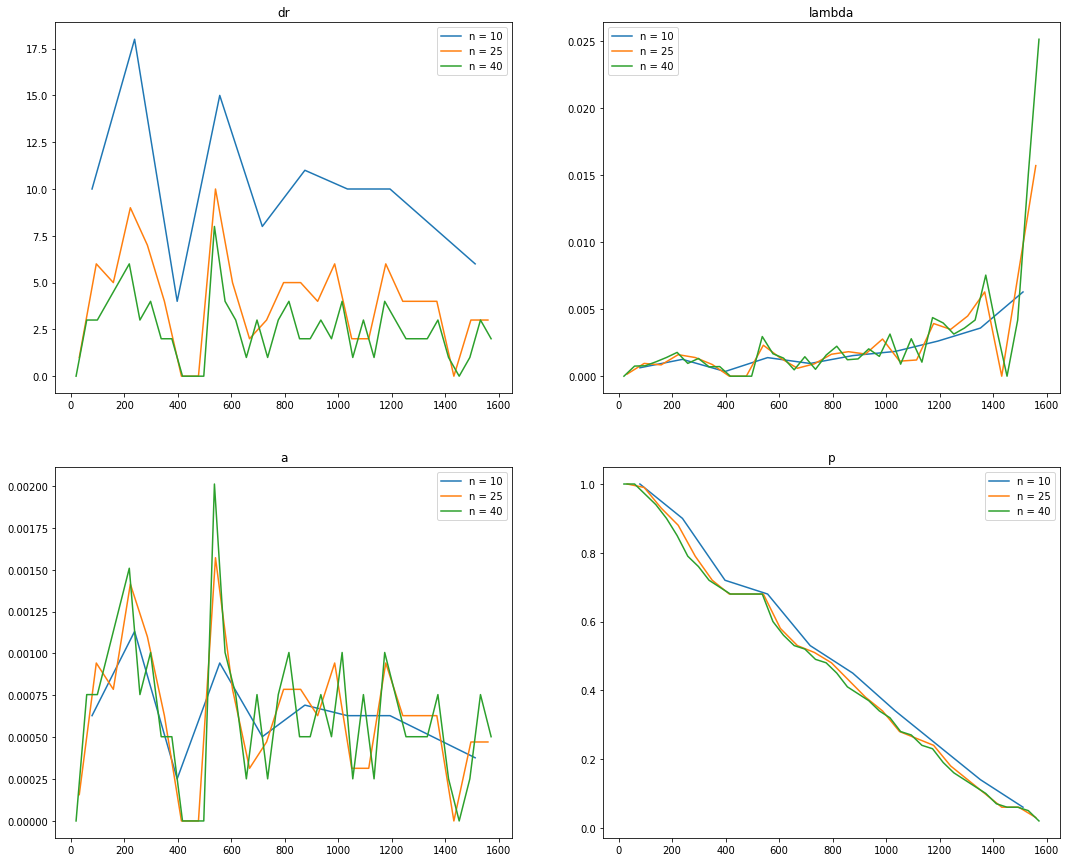

In [9]:
plot(indicators_10, indicators_25, indicators_40)